<a href="https://colab.research.google.com/github/AIGeekProgrammer/MiscellaneousAI/blob/main/Logistic%20Regression/Logistic_Regression_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook: Logistic Regression on a simple 2D dataset using PyTorch<br>
Author: Szymon Manduk<br>
Created: 12 Feb 2022<br>
Last modyfication: 12 Feb 2022<br>

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
# Generate 2 blobs using sklearn, preserving random state
X, y = datasets.make_blobs(500, centers=[[-1.4,1.4], [1.4,-1.4]], random_state=1)

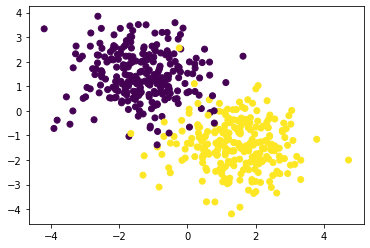

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
# splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

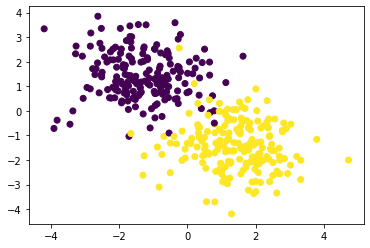

In [ ]:
# let's see training dataset
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

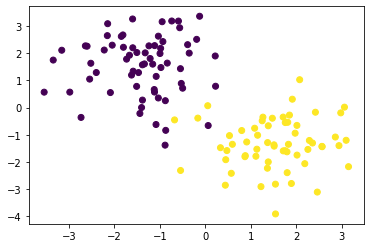

In [ ]:
# let's see test dataset
plt.scatter(X_test[:,0], X_test[:,1], c=y_test)

In [ ]:
# converting into tensor
train_inputs = torch.from_numpy(X_train)
train_labels = torch.from_numpy(y_train)
test_inputs = torch.from_numpy(X_test)
test_labels = torch.from_numpy(y_test)
print(f'Train dataset: {len(train_inputs)}. Test dataset: {len(test_inputs)}')
print(train_labels.size())
print(test_labels.size())

Train dataset: 375. Test dataset: 125
torch.Size([375])
torch.Size([125])


In [ ]:
# To implement logistic regression we use linear model with 
# the logistic sigmoid function at the end
from torch.nn.modules.linear import Linear

class LogisticRegression(torch.nn.Module):
  def __init__(self, n_inputs, n_outputs):
    super().__init__()
    self.linear = Linear(n_inputs, n_outputs)
  def forward(self, x):
    return torch.sigmoid(self.linear(x))

In [ ]:
# hyperparameters
epochs = 2000
learning_rate = 0.01
n_inputs = 2 
n_outputs = 1 

In [ ]:
model = LogisticRegression(n_inputs, n_outputs)

In [ ]:
# inputs we generated from numpy arrays are floats. We need convert our Double
# model into float one
model = model.float()

In [ ]:
# create loss function and optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# training loop
for epoch in range(epochs):
  for x, y in zip(train_inputs, train_labels):
    y_pred = model.forward(x.float())
    loss = criterion(y_pred, y.view(1).float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  if epoch % 50 == 0:
    print(f'Epoch #:{epoch} with loss={loss}')

Epoch #:0 with loss=0.03595579415559769
Epoch #:50 with loss=0.0006259850342758
Epoch #:100 with loss=0.0005255530122667551
Epoch #:150 with loss=0.0005154745886102319
Epoch #:200 with loss=0.0005142819136381149
Epoch #:250 with loss=0.0005141625879332423
Epoch #:300 with loss=0.0005141625879332423
Epoch #:350 with loss=0.0005141625879332423
Epoch #:400 with loss=0.0005141625879332423
Epoch #:450 with loss=0.0005141625879332423
Epoch #:500 with loss=0.0005141625879332423
Epoch #:550 with loss=0.0005141625879332423
Epoch #:600 with loss=0.0005141625879332423
Epoch #:650 with loss=0.0005141625879332423
Epoch #:700 with loss=0.0005141625879332423
Epoch #:750 with loss=0.0005141625879332423
Epoch #:800 with loss=0.0005141625879332423
Epoch #:850 with loss=0.0005141625879332423
Epoch #:900 with loss=0.0005141625879332423
Epoch #:950 with loss=0.0005141625879332423
Epoch #:1000 with loss=0.0005141625879332423
Epoch #:1050 with loss=0.0005141625879332423
Epoch #:1100 with loss=0.0005141625879

In [ ]:
# calculate accuracy for test dataset
n_cases = len(test_labels)
hits = 0
idx = 0
for x, y in zip( test_inputs, test_labels):
  y_pred = model.forward(x.float())
  if torch.round(y_pred) == y:
    hits += 1
  else:
    # datapoints with inaccurate predictions are marked with -1
    # for them to be visible on a plot
    test_labels[idx] = -1  
  idx += 1
accuracy = hits / n_cases * 100
print(f'Test set accuracy:{accuracy:.2f}')

Test set accuracy:96.00


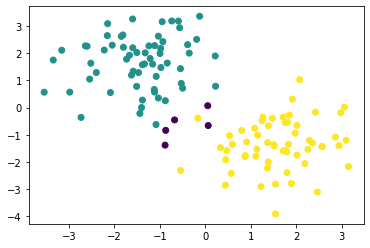

In [ ]:
# print test dataset, with wrong predictions printed with the third color
plt.scatter(test_inputs[:,0], test_inputs[:,1], c=test_labels)